In [47]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import os
import matplotlib as mpl
if os.environ.get('DISPLAY', '') == '':
    print('no display found. Using non-interactive Agg backend')
#     mpl.use('Agg')
import future.utils
mpl.rcParams["text.usetex"] = False
sns.set_style("whitegrid")
sns.axes_style("whitegrid")
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
import json
import numpy as np
import tqdm


no display found. Using non-interactive Agg backend


In [3]:
print('matplotlib: {}'. format(mpl.__version__))

matplotlib: 3.5.1


# Preliminaries

In [4]:
results = pd.read_csv("aggregate/results_media_model.csv", index_col=[0])


In [5]:
results = results[results['gam'] != 0.25]
results

,n,p,eps,gam,gam_media,p_media,max_it,media_op,avg_ncluster,std_ncluster,...,median_opinion,avg_00_perc,avg_05_perc,avg_095_perc,avg_005_perc,10B_avg_entr,10B_std_entr,100B_avg_entr,100B_std_entr,100B_norm_entr
0,100,1.0,0.3,0.00,0.00,0.5,1000000,0.05;0.95,1.917247,0.139437,...,0.547112,0.4966,0.0048,0.4986,0.4966,0.682894,0.059351,0.683276,0.060095,0.167361
1,100,1.0,0.2,0.75,0.75,0.5,1000000,0.05;0.5;0.95,2.861434,0.253250,...,0.500045,0.2843,0.4315,0.2680,0.2843,1.182315,0.141936,1.186385,0.145965,0.290592
2,100,1.0,0.3,0.00,0.00,0.2,1000000,0.05;0.95,1.771977,0.290598,...,0.512833,0.4441,0.1297,0.4175,0.4441,0.593931,0.165382,0.594069,0.165018,0.145511
3,100,1.0,0.4,1.25,1.25,0.2,1000000,0.5,1.060078,0.065546,...,0.500177,0.0178,0.9721,0.0101,0.0178,0.266965,0.256676,0.281470,0.264232,0.068943
4,100,1.0,0.5,0.00,0.00,0.4,1000000,0.5,1.000000,0.000000,...,0.500133,0.0000,1.0000,0.0000,0.0000,0.024558,0.106782,0.024558,0.106782,0.006015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,100,1.0,0.2,0.00,0.00,0.2,1000000,0.05;0.95,2.553017,0.391752,...,0.489992,0.3250,0.2376,0.3420,0.3250,0.962649,0.156338,0.962649,0.156338,0.235790
572,100,1.0,0.5,1.25,1.25,0.2,1000000,0.05;0.95,1.093833,0.103774,...,0.526807,0.4770,0.0000,0.5230,0.4770,0.153744,0.129727,0.153744,0.129727,0.037658
573,100,1.0,0.5,1.00,1.00,0.3,1000000,0.5,1.000000,0.000000,...,0.500197,0.0000,1.0000,0.0000,0.0000,0.143374,0.241776,0.143374,0.241776,0.035118
574,100,1.0,0.5,0.75,0.75,0.0,1000000,0.0,1.000408,0.004080,...,0.505966,0.0002,0.9908,0.0000,0.0002,0.030149,0.122832,0.216650,0.258465,0.053066


In [6]:
gams = list(results.gam.unique())
p_medias = list(results.p_media.unique())
epss = list(results.eps.unique())
mos = list(results.media_op.unique())
print(gams, p_medias, epss, mos)

[0.0, 0.75, 1.25, 1.0, 0.5, 1.5] [0.5, 0.2, 0.4, 0.1, 0.3, 0.0] [0.3, 0.2, 0.4, 0.5] ['0.05;0.95', '0.05;0.5;0.95', '0.5', '0.0']


In [7]:
threemedia = results[results['media_op'] == '0.05;0.5;0.95']
print(len(threemedia))
gams = list(threemedia.gam.unique())
p_medias = list(threemedia.p_media.unique())
epss = list(threemedia.eps.unique())
mos = list(threemedia.media_op.unique())
print(gams, p_medias, epss, mos)

144
[0.75, 0.5, 1.0, 1.5, 1.25, 0.0] [0.5, 0.1, 0.4, 0.0, 0.2, 0.3] [0.2, 0.4, 0.5, 0.3] ['0.05;0.5;0.95']


In [8]:
twomedia = results[results['media_op'] == '0.05;0.95']
print(len(twomedia))
gams = list(twomedia.gam.unique())
p_medias = list(twomedia.p_media.unique())
epss = list(twomedia.eps.unique())
mos = list(twomedia.media_op.unique())
print(gams, p_medias, epss, mos)

144
[0.0, 1.5, 0.5, 1.0, 1.25, 0.75] [0.5, 0.2, 0.4, 0.3, 0.0, 0.1] [0.3, 0.4, 0.2, 0.5] ['0.05;0.95']


In [9]:
extremist = results[results['media_op'] == '0.0']
print(len(extremist))
gams = list(extremist.gam.unique())
p_medias = list(extremist.p_media.unique())
epss = list(extremist.eps.unique())
mos = list(extremist.media_op.unique())
print(gams, p_medias, epss, mos)

144
[1.25, 1.0, 0.0, 0.5, 0.75, 1.5] [0.1, 0.3, 0.0, 0.2, 0.5, 0.4] [0.3, 0.5, 0.2, 0.4] ['0.0']


In [10]:
moderate = results[results['media_op'] == '0.5']
print(len(moderate))
gams = list(moderate.gam.unique())
p_medias = list(moderate.p_media.unique())
epss = list(moderate.eps.unique())
mos = list(moderate.media_op.unique())
print(gams, p_medias, epss, mos)

144
[1.25, 0.0, 1.0, 0.75, 1.5, 0.5] [0.2, 0.4, 0.5, 0.0, 0.3, 0.1] [0.4, 0.5, 0.2, 0.3] ['0.5']


In [11]:
deffuant = results[results['gam']==0.0]

In [12]:
measures = list(deffuant.columns)[8:]

In [13]:
print(measures)

['avg_ncluster', 'std_ncluster', 'avg_pwdist', 'std_pwdist', 'avg_niter', 'std_niter', 'avg_ncluster_0.001', 'std_ncluster_0.001', 'nruns', 'avg_opinion', 'std_opinions', 'median_opinion', 'avg_00_perc', 'avg_05_perc', 'avg_095_perc', 'avg_005_perc', '10B_avg_entr', '10B_std_entr', '100B_avg_entr', '100B_std_entr', '100B_norm_entr']


# Bounded confidence model with media

In [14]:
%cd plots

/data1/users/pansanella/GitHub/AlgorithmicBias/plots


In [15]:
%mkdir "deffuant"

mkdir: impossibile creare la directory "deffuant": File già esistente


In [16]:
%cd deffuant

/data1/users/pansanella/GitHub/AlgorithmicBias/plots/deffuant


In [21]:
def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

In [22]:
from matplotlib.colors import LinearSegmentedColormap

hex_list = ['#357db0', '#ce2626']

cmap=get_continuous_cmap(hex_list)

100B_norm_entr


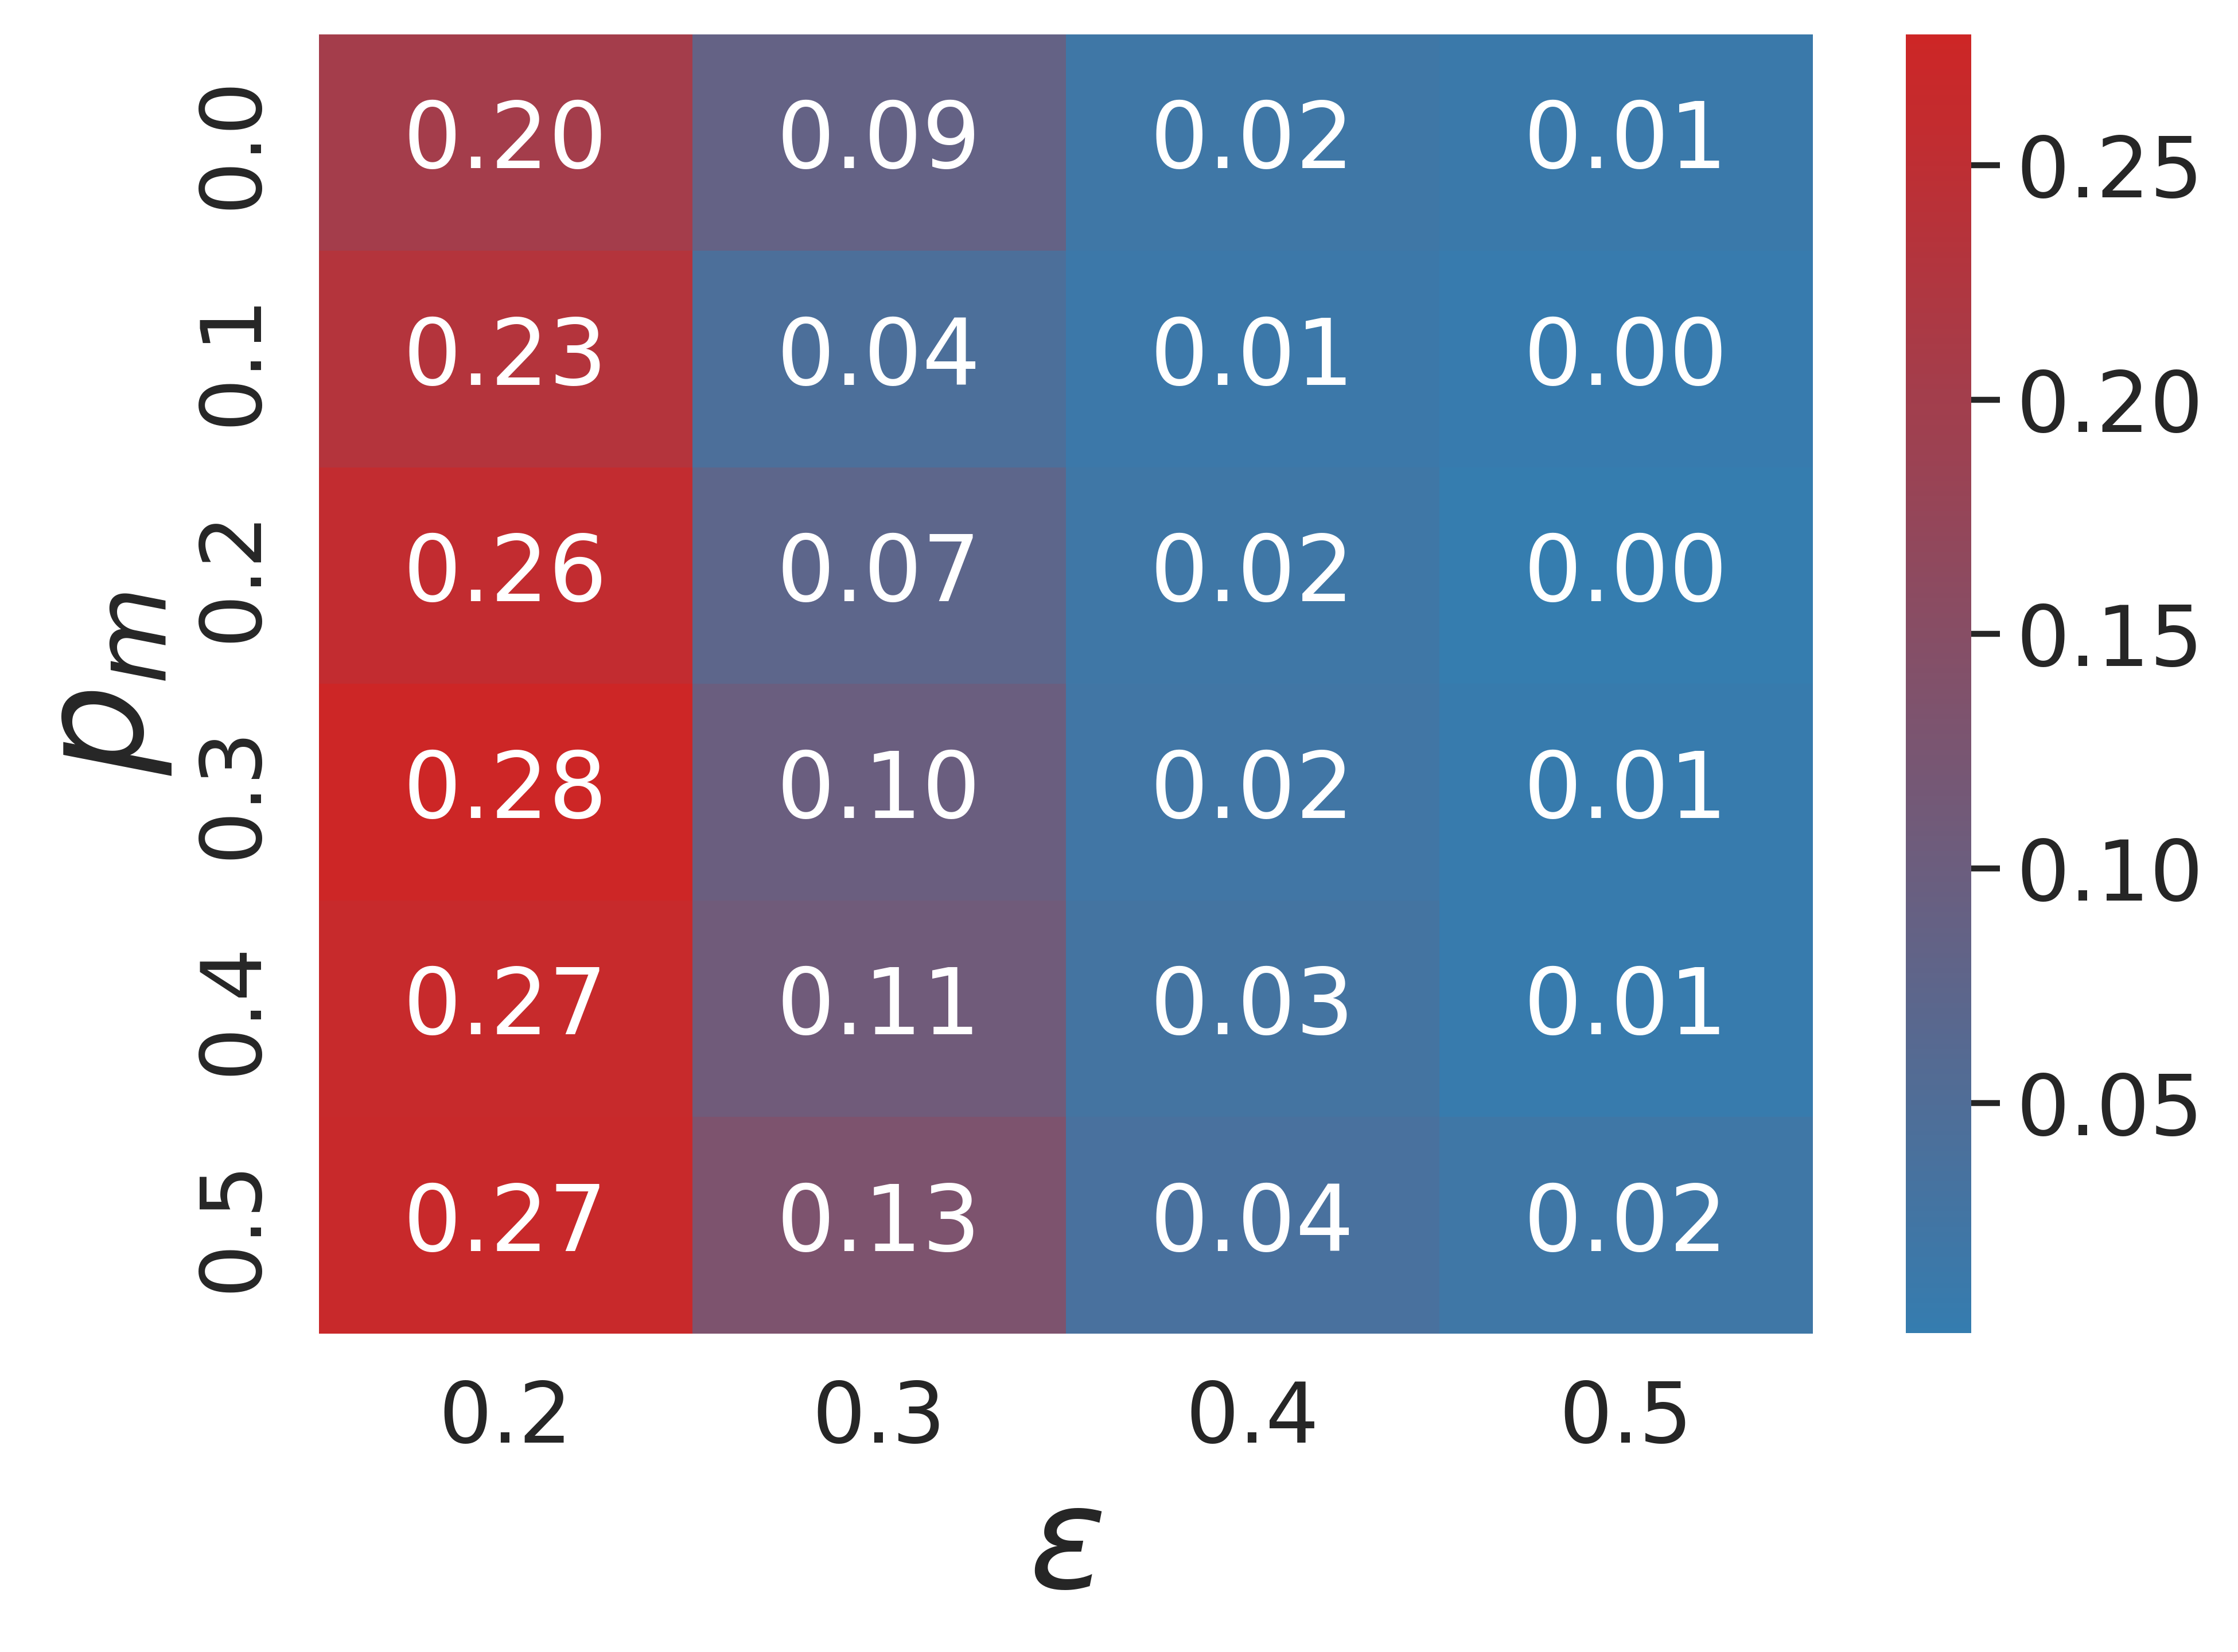

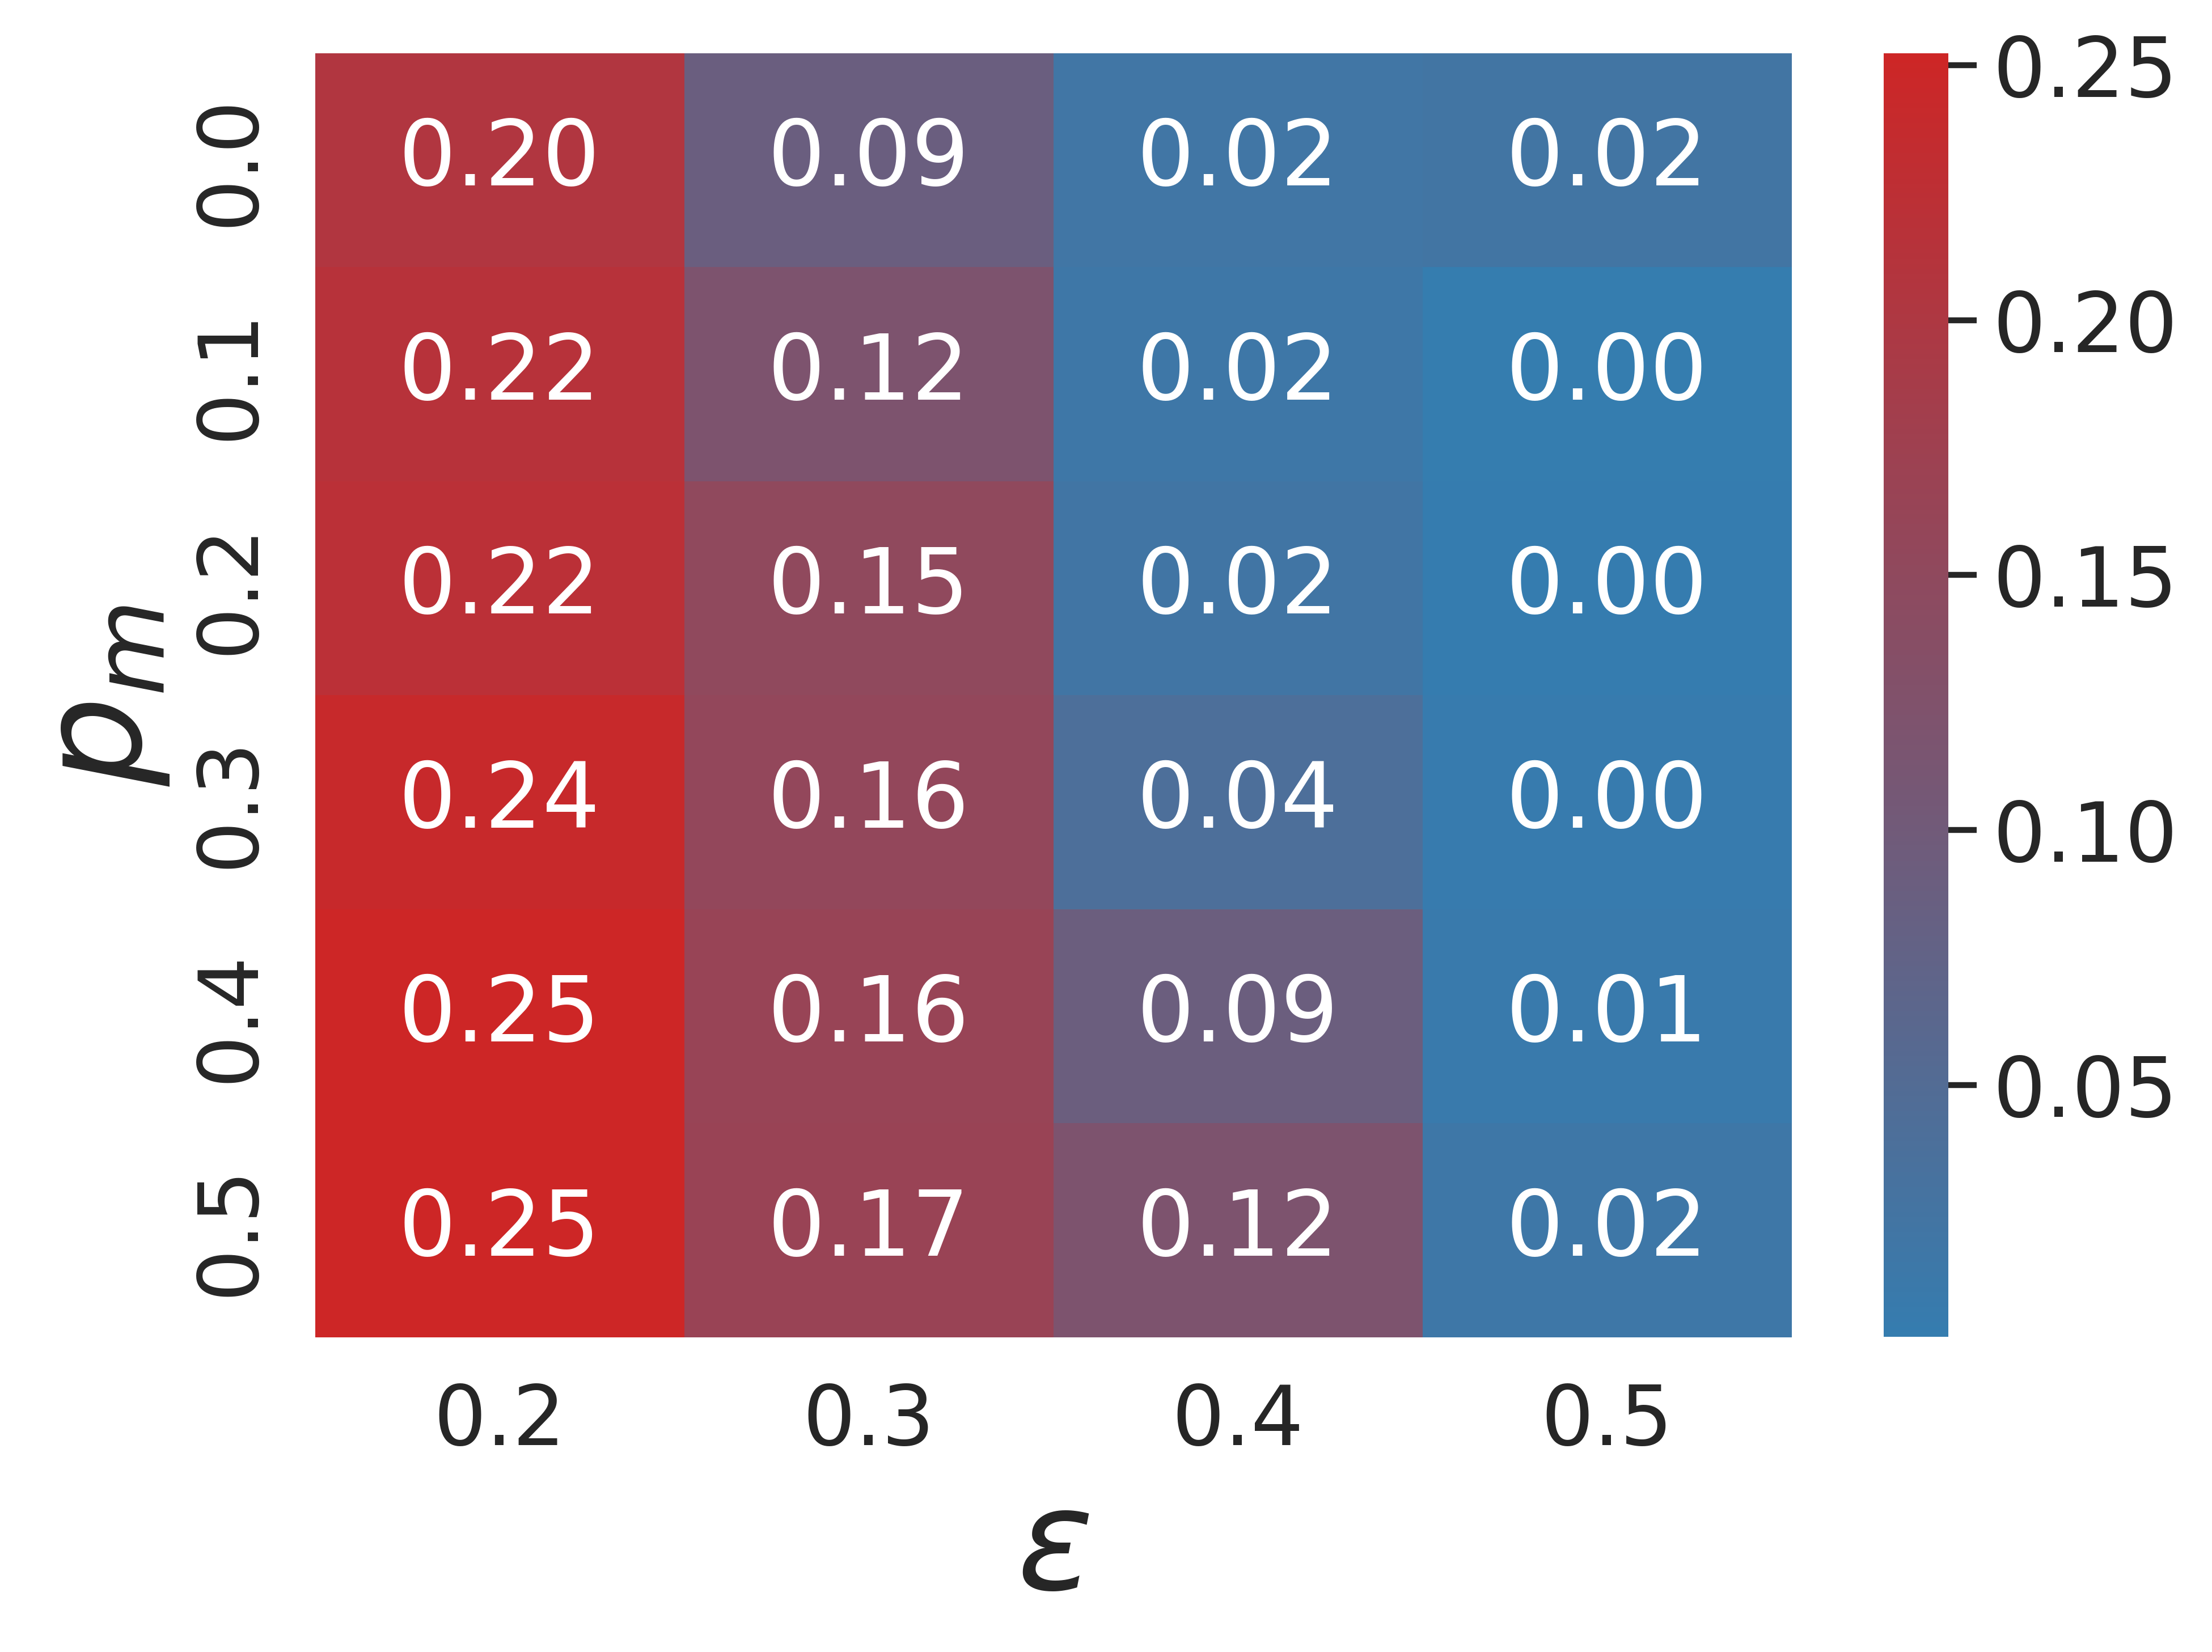

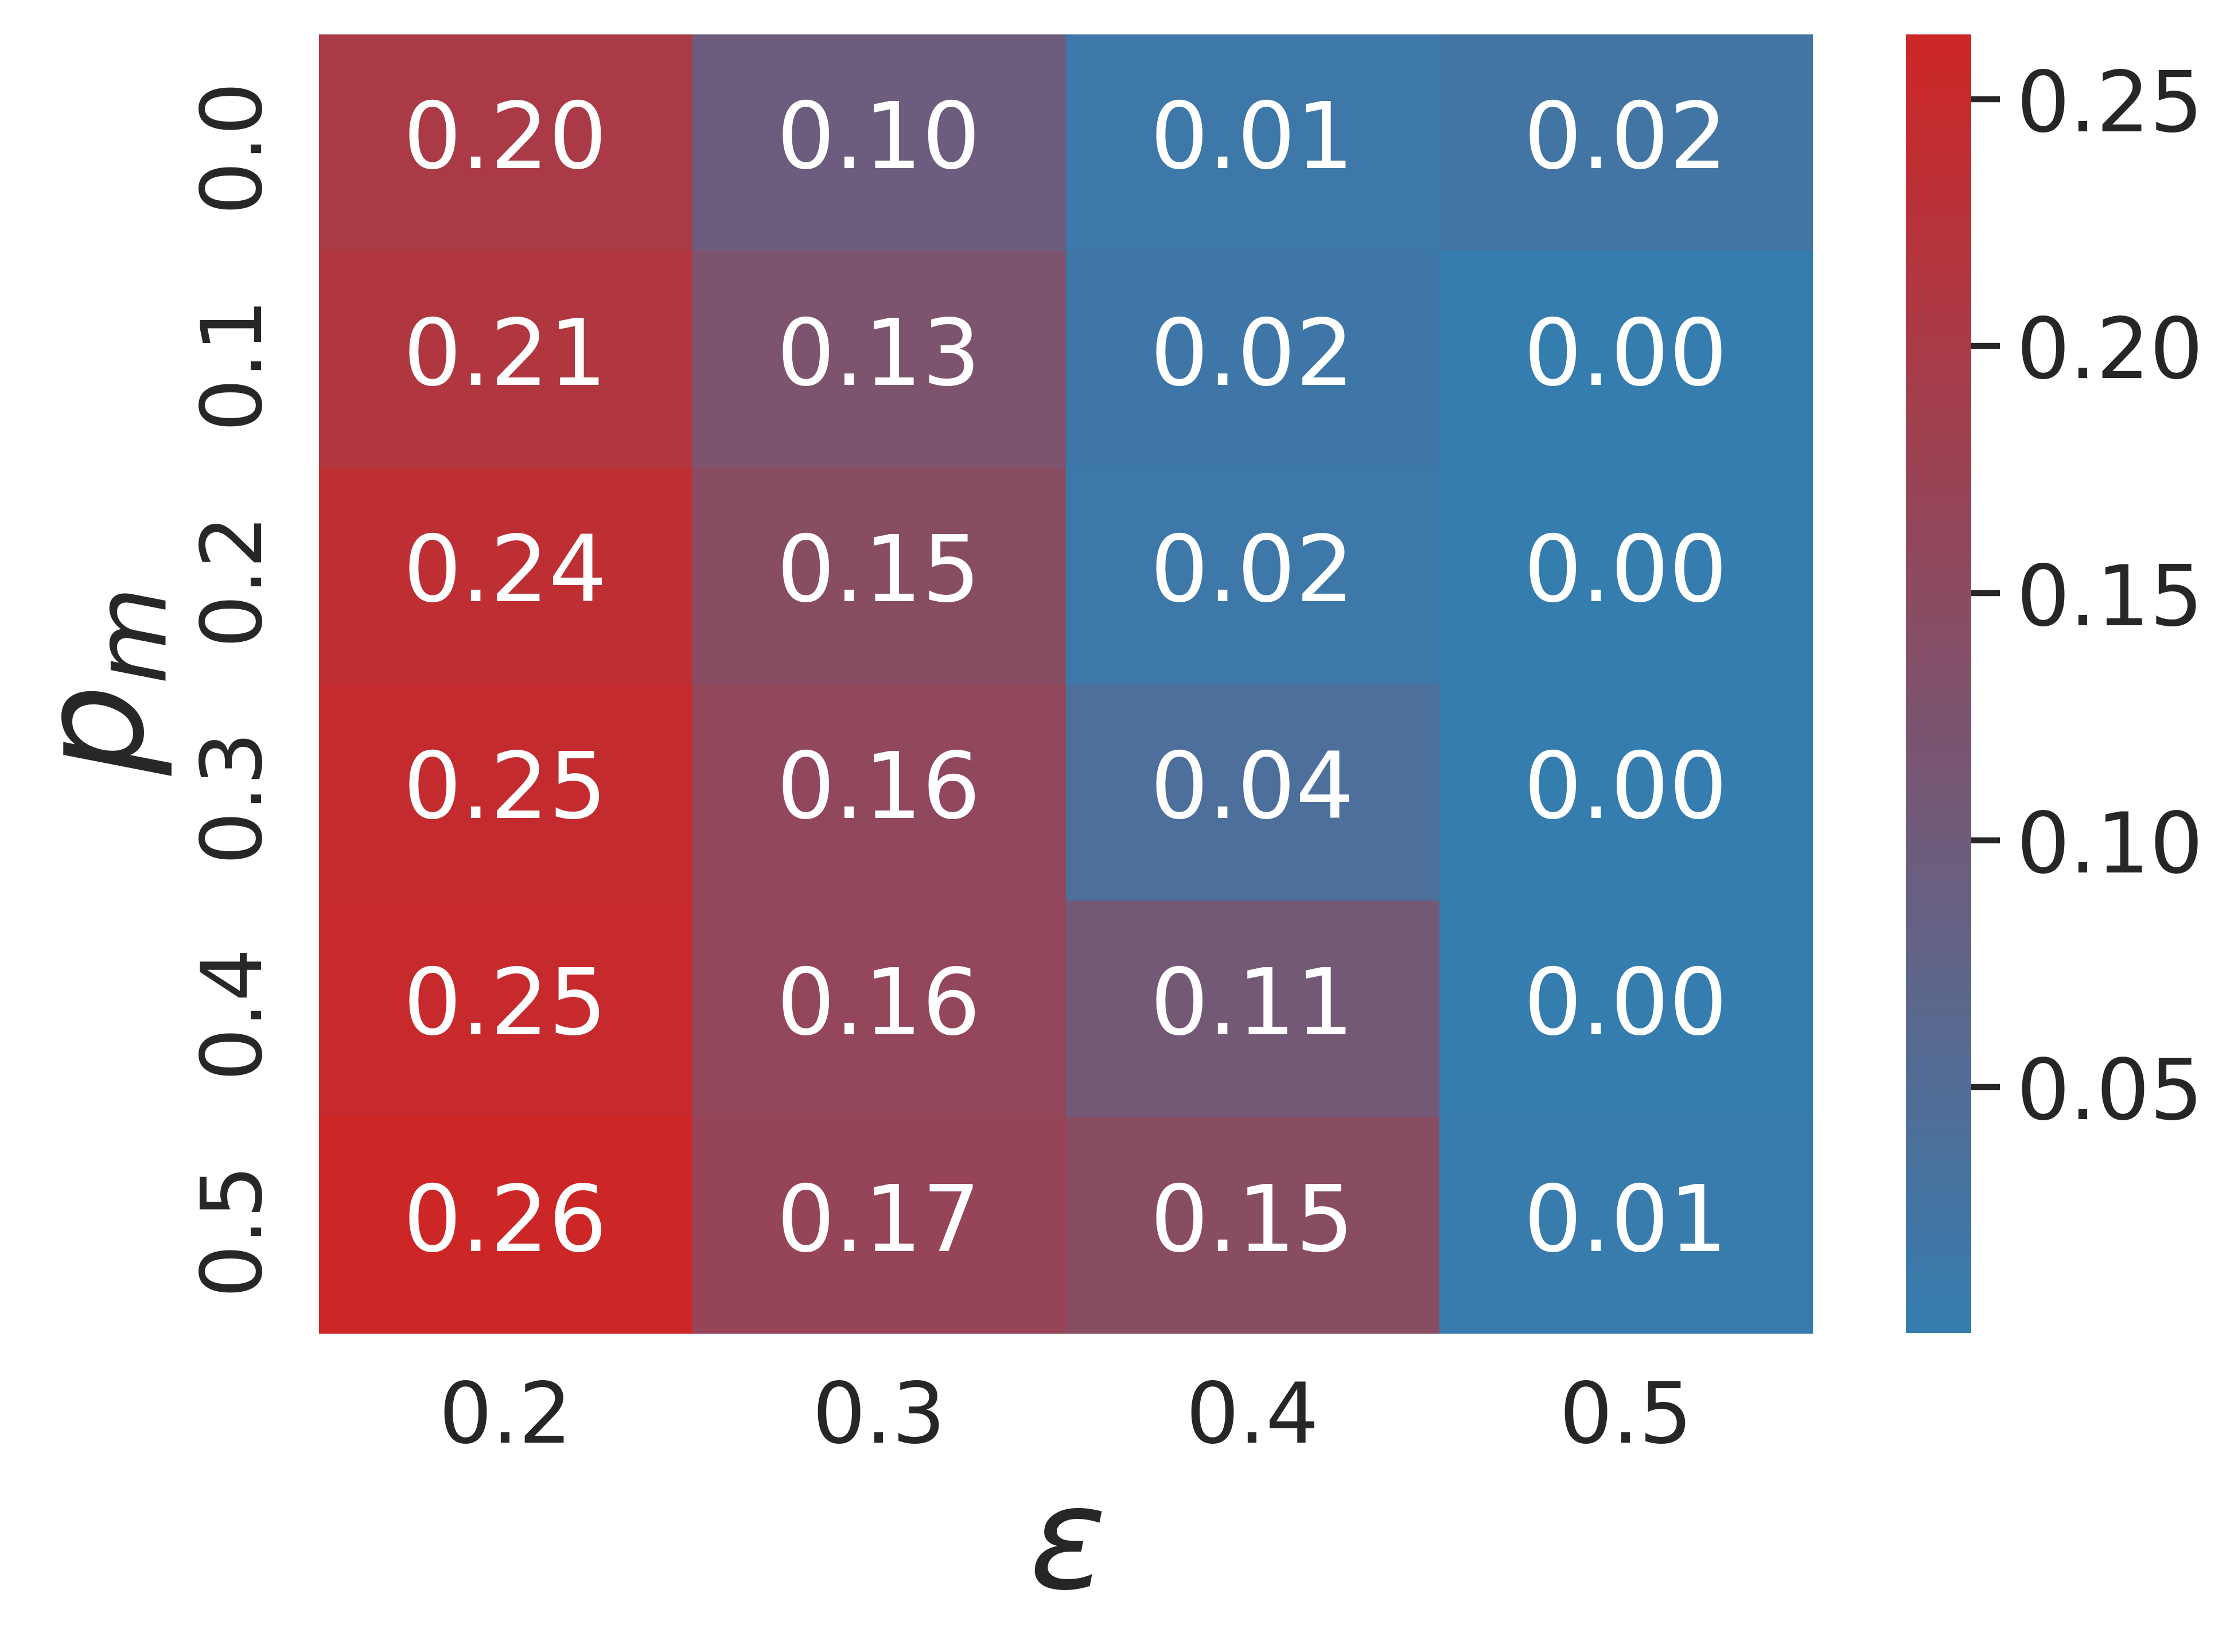

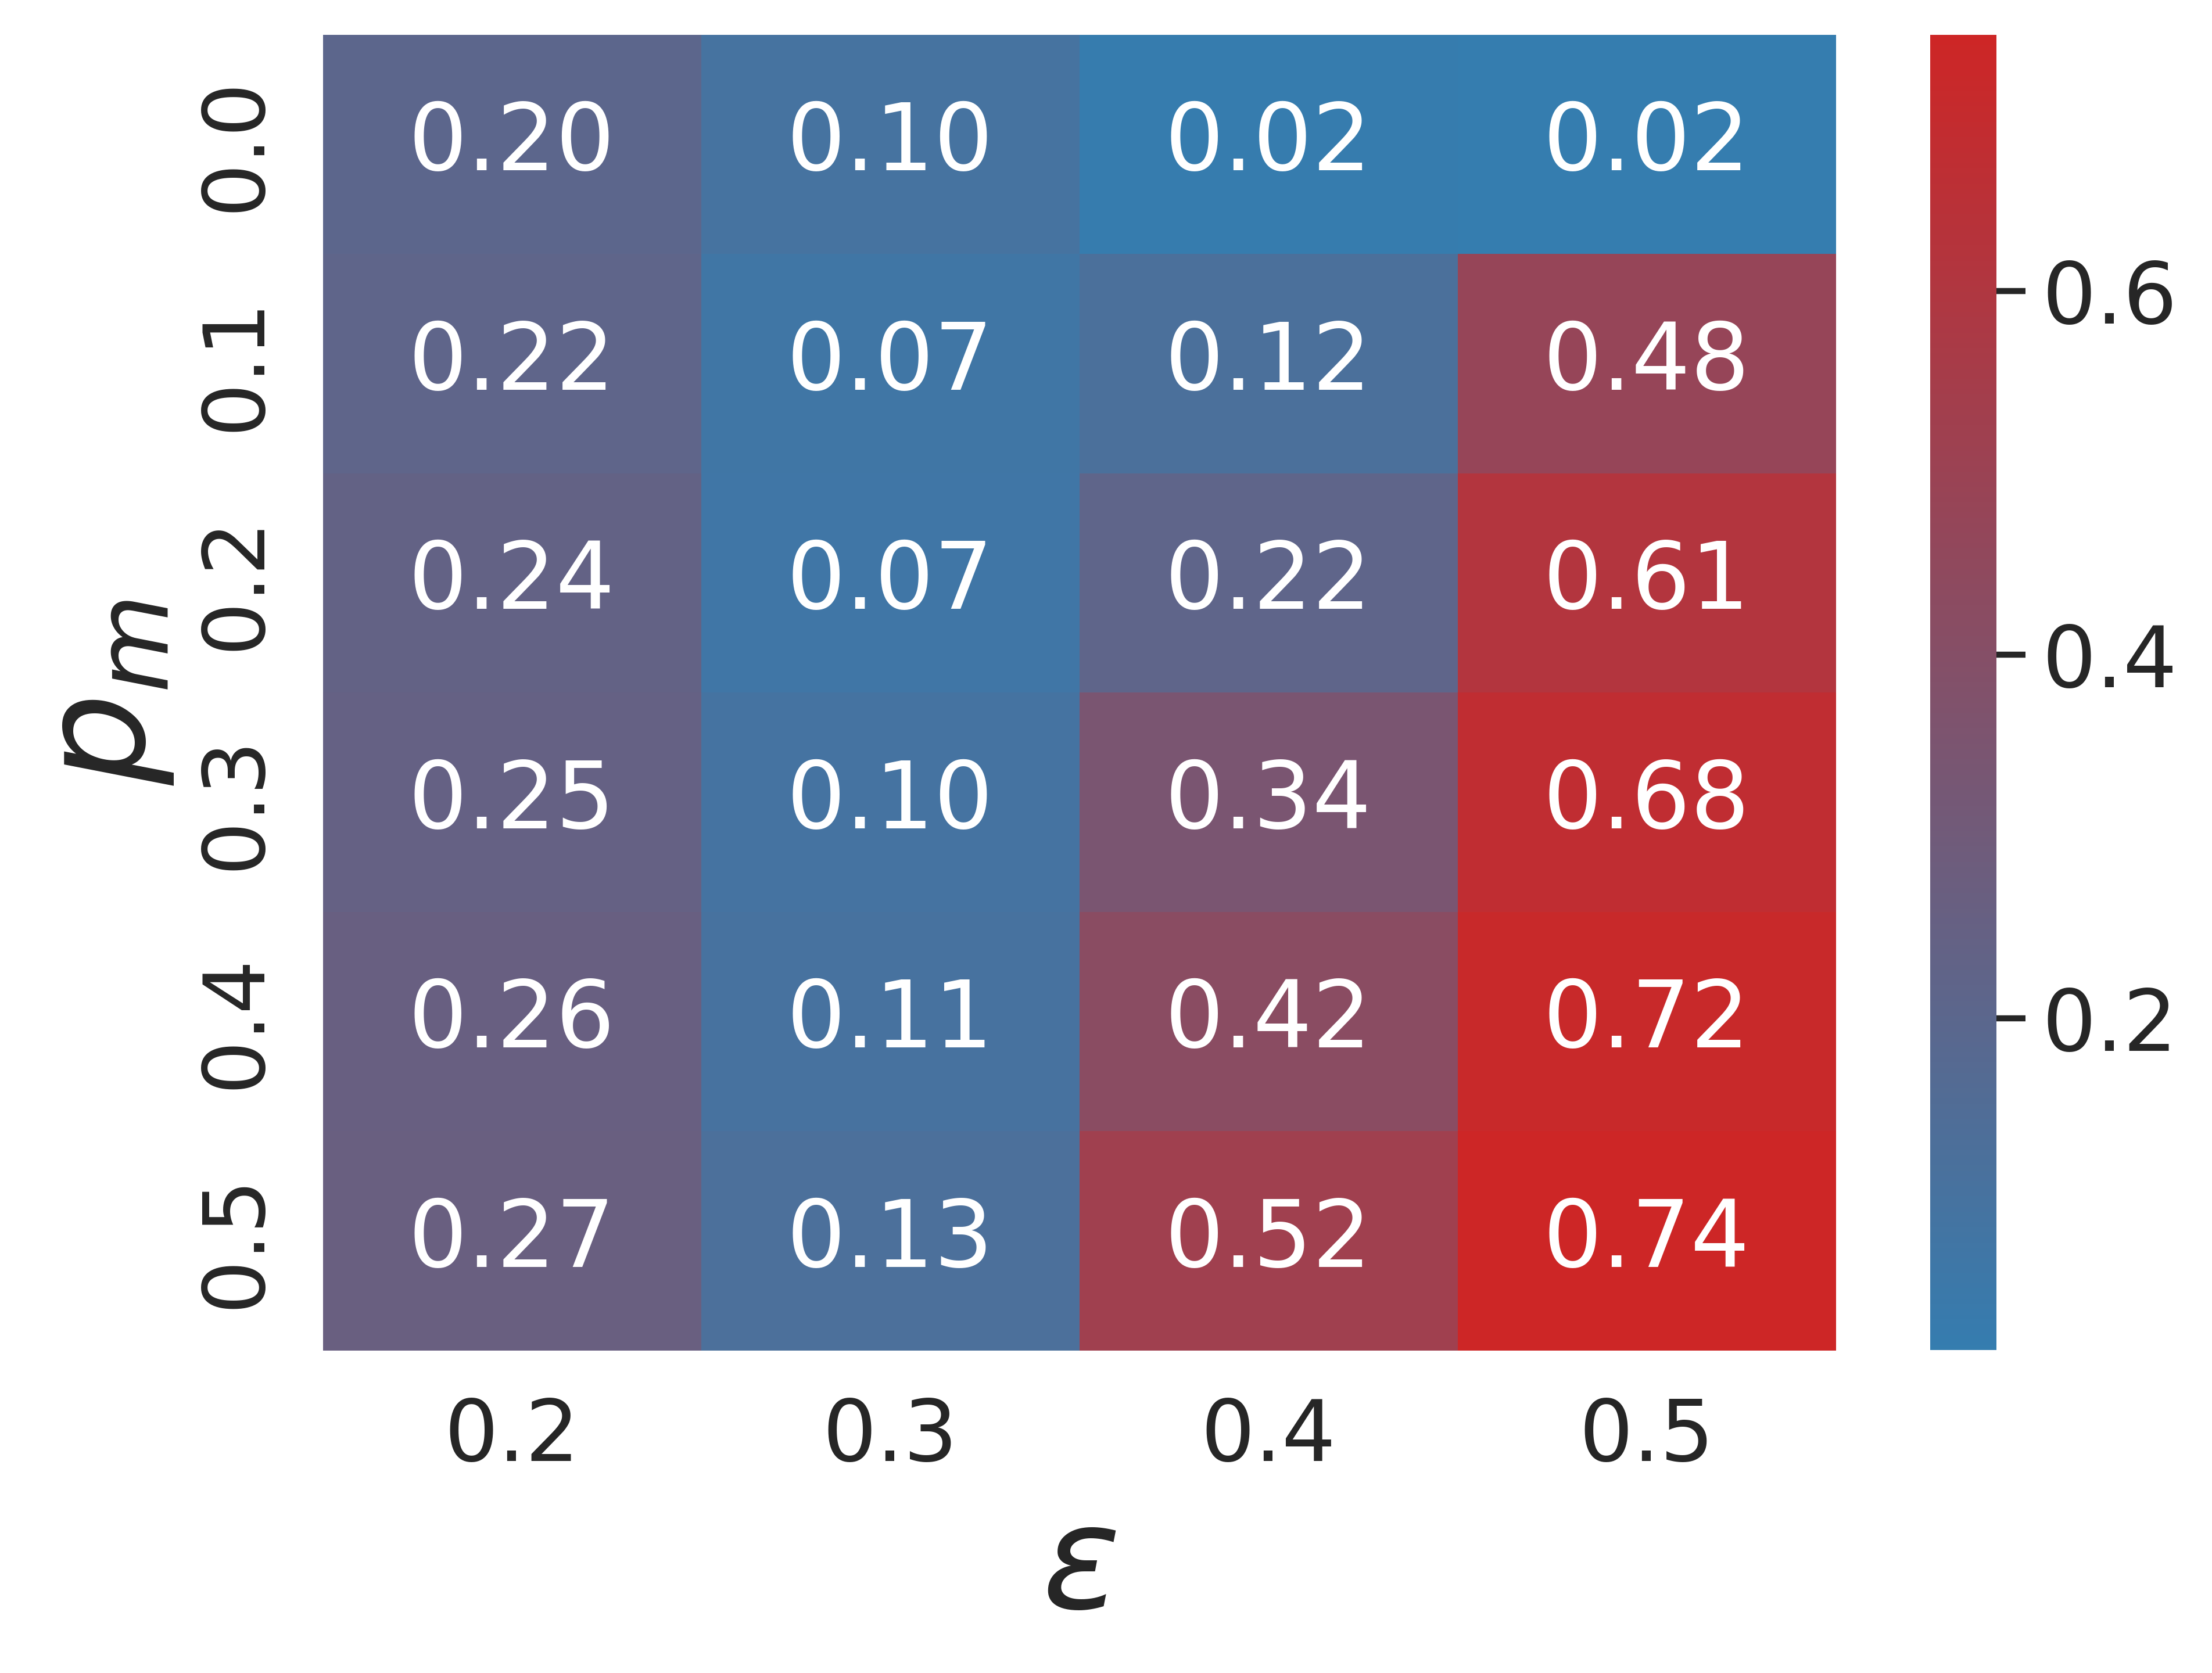

In [36]:
sns.set(font_scale=1.6)
for measure in ['100B_norm_entr']:
    print(measure)
    i=0
    for mo in ['0.5', '0.0', '0.05;0.95', '0.05;0.5;0.95']:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5), dpi=600)
        titles = ['moderate', 'extremist', 'polarized', 'balanced']
        x = "p_media"
        y = "eps"
        data = deffuant[deffuant["media_op"]==mo]
        df = data.pivot(x, y, measure)
        a=sns.heatmap(df, cbar=True, fmt=".2f", annot=True, ax = ax, cmap=cmap)
        ax.set_xlabel(r'$\epsilon$', fontsize=30)
        ax.set_ylabel(r'$p_m$', fontsize=30)
        plt.savefig(f'{measure}_{titles[i]}_deffuant_heatmap.png')
        i+=1


In [17]:
%xmode Verbose

Exception reporting mode: Verbose


In [18]:
measures

['avg_ncluster',
 'std_ncluster',
 'avg_pwdist',
 'std_pwdist',
 'avg_niter',
 'std_niter',
 'avg_ncluster_0.001',
 'std_ncluster_0.001',
 'nruns',
 'avg_opinion',
 'std_opinions',
 'median_opinion',
 'avg_00_perc',
 'avg_05_perc',
 'avg_095_perc',
 'avg_005_perc',
 '10B_avg_entr',
 '10B_std_entr',
 '100B_avg_entr',
 '100B_std_entr',
 '100B_norm_entr']

avg_05_perc


/tmp/ipykernel_1640314/3046301738.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


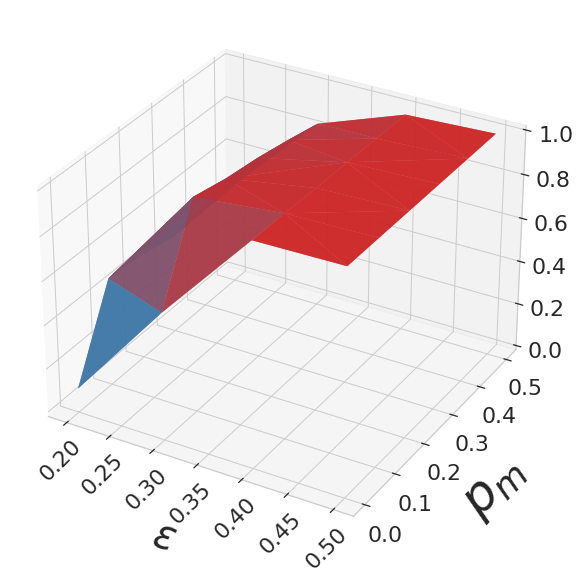

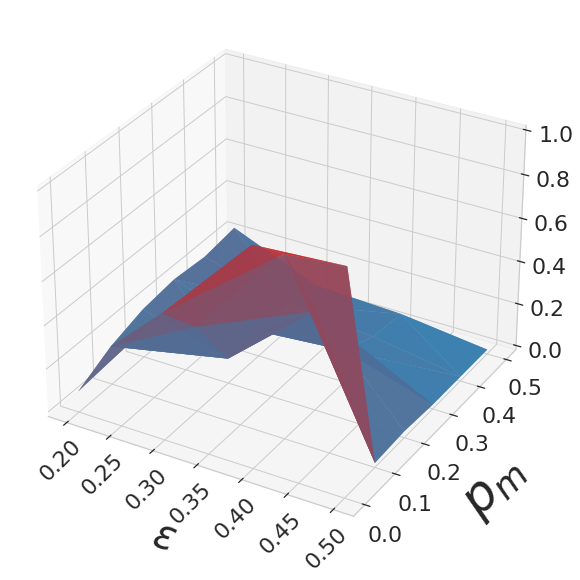

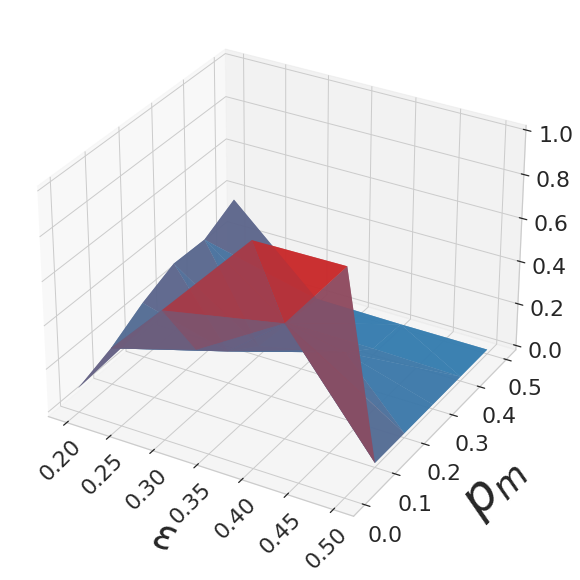

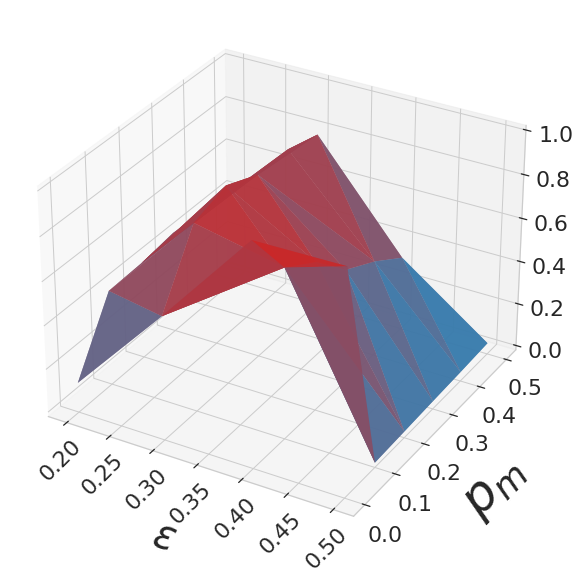

In [31]:
sns.set(font_scale=1.8)
sns.set_style("whitegrid")
for measure in ['avg_05_perc']:
    print(measure)
    i=0
    for mo in ['0.5', '0.0', '0.05;0.95', '0.05;0.5;0.95']:
        titles = ['moderate', 'extremist', 'polarized', 'balanced']
        x = "p_media"
        y = "eps"
        data = deffuant[deffuant["media_op"]==mo]
        fig = plt.figure(figsize=(15, 10))
        ax = fig.gca(projection='3d')
        ax.plot_trisurf(data['eps'], data['p_media'], data[measure], vmin=min(deffuant[measure]), vmax=max(deffuant[measure]), cmap=cmap, linewidth=0.0, alpha=0.8)
        surf=ax.plot_trisurf(data['eps'], data['p_media'], data[measure], cmap=cmap, linewidth=0.0, alpha=0.8)
        # fig.colorbar(surf, shrink=0.5, aspect=6).ax.tick_params(labelsize=22)
        ax.set_xlabel(r'$\epsilon$', fontsize=40, labelpad=30)
        ax.set_ylabel(r'$p_m$', fontsize=50, labelpad=30)
        ax.tick_params(axis='x', which='major', labelsize=22, pad=2, labelrotation=45)
        ax.tick_params(axis='y', which='major', labelsize=22, pad=10)
        ax.tick_params(axis='z', which='major', labelsize=22, pad=10)  
        ax.set_zlim(0.0, 1.0) 
        plt.savefig(f'{measure}_{titles[i]}_deffuant_surface.png')
        i+=1                

# A single - moderate - media

# Extremist media - propaganda

# Polarised media landscape

# Balanced media landscape